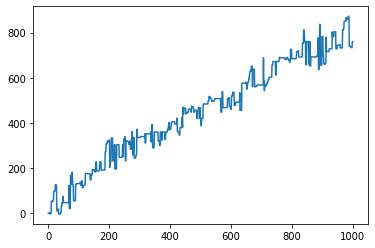

In [60]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
day = 0
file = "logs/8ce23af5-e571-4f78-a8b0-4d3c364e6afb.log"
path_nn = f"island-data-bottle-round-1/trades_round_1_day_{day}_nn.csv"

df = pd.read_csv(path_nn, sep=';')
df = df[df['symbol'] == 'PEARLS'].reset_index(drop=True).fillna(0)

with open(file) as f:
    f = f.readlines()

pnl = [0.0]
spent = 0.0
inv = 0
market_value = 10000

for line in f:
    time = re.findall(r'\b\d+\b', line)
    if not time: continue
    time = int(time[0])
    if np.any(df[df['timestamp'] == time].to_numpy()):
        market_value = df[df['timestamp'] == time]['price'].mean()
    if "SELL" in line:
        nums = re.findall(r'\b\d+\b', line)
        inv -= float(nums[1])
        spent -= float(nums[1])*float(nums[2])
    elif "BUY" in line:
        nums = re.findall(r'\b\d+\b', line)
        inv += float(nums[1])
        spent += float(nums[1])*float(nums[2])
    pnl.append(inv*market_value - spent)
plt.plot(pnl)
plt.show()
